## Aula 05 - Dummy classifiers e árvore de decisão

### Trabalhando num novo projeto

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
a_trocar = {
    'no' : 0,
    'yes' : 1,
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [4]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [5]:
dados['km_por_ano'] = dados.milhas_por_ano * 160934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,3508522134
1,1,7843,1998,40557.96,1,24,1262205362
2,2,7109,2006,89627.50,0,16,1144079806
3,3,26823,2015,95276.14,0,7,4316732682
4,4,7935,2014,117384.68,1,8,1277011290


In [6]:
dados = dados.drop(columns= ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,3508522134
1,40557.96,1,24,1262205362
2,89627.50,0,16,1144079806
3,95276.14,0,7,4316732682
4,117384.68,1,8,1277011290


In [7]:
# classificando os dados - modelo linear SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify=y)

print(f" Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos ")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'A acurácia foi {(acuracia):.2f}%')

 Treinaremos com 7500 elementos e testaremos com 2500 elementos 
A acurácia foi 58.00%


d:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Dummy classifier e svc

é necessário escolher um baseline 

Dummy stratified

In [8]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'A acurácia do Dummy  stratified foi {(acuracia):.2f}%')

A acurácia do Dummy  stratified foi 52.44%


In [9]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print(f'A acurácia do Dummy  stratified foi {(acuracia):.2f}%')

A acurácia do Dummy  stratified foi 50.68%


Dummy most frequent

In [10]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'A acurácia do Dummy  mostfrequent foi {(acuracia):.2f}%')

A acurácia do Dummy  mostfrequent foi 58.00%


In [11]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print(f'A acurácia do Dummy  stratified foi {(acuracia):.2f}%')

A acurácia do Dummy  stratified foi 58.00%


In [12]:
# classificador SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify=y)

print(f" Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos ")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'A acurácia foi {(acuracia):.2f}%')

 Treinaremos com 7500 elementos e testaremos com 2500 elementos 
A acurácia foi 77.48%


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify=y)

print(f" Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos ")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'A acurácia foi {(acuracia):.2f}%')


 Treinaremos com 7500 elementos e testaremos com 2500 elementos 
A acurácia foi 73.20%


In [14]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify=y)

print(f" Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos ")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'A acurácia foi {(acuracia):.2f}%')


 Treinaremos com 7500 elementos e testaremos com 2500 elementos 
A acurácia foi 76.84%


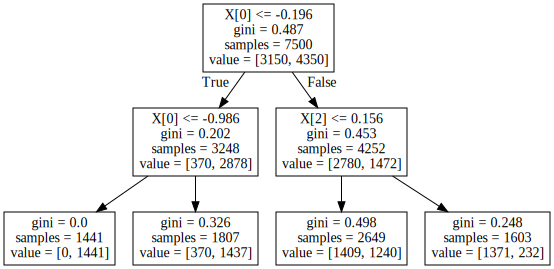

In [16]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

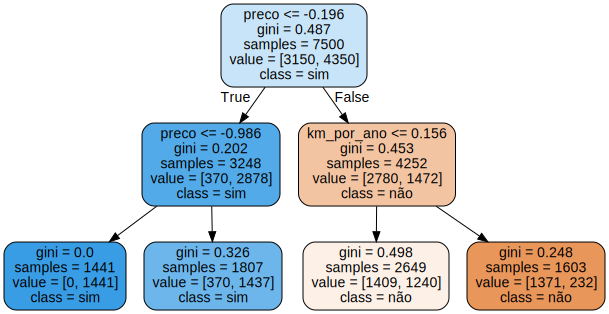

In [19]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled=True, rounded=True,
                           feature_names=features,
                           class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

Para arvore de decisão funcionar bem, não é necessário um escalador (scaler)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify=y)

print(f" Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos ")

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f'A acurácia foi {(acuracia):.2f}%')


 Treinaremos com 7500 elementos e testaremos com 2500 elementos 
A acurácia foi 79.28%


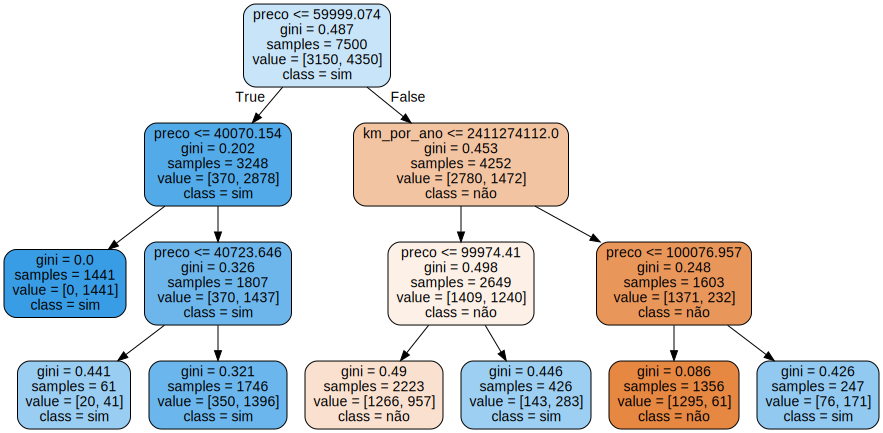

In [24]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled=True, rounded=True,
                           feature_names=features,
                           class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico